In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('/Users/vikramjeet/Downloads/titanic (1).csv')
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
#Removing passenger ID, name, sibsip, parch, ticket, cabin and embarked

df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 'columns' , inplace = True)
df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [4]:
X = df.drop(['Survived'], axis = 'columns') #features, inputs
y = df['Survived'] #target variable

In [5]:
#Encoding the "Sex" column to numerical using dummy encoding

dummies = pd.get_dummies(X['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [6]:
#Append these newly generated values to the dataframe

X = pd.concat([X, dummies], axis = 'columns')
X

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [7]:
#Now dropping the original 'Sex' column

X.drop('Sex', axis = 'columns', inplace = True)
X

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,NaN,23.4500,1,0
889,1,26.0,30.0000,0,1


In [10]:
# Checking for nulls (na)

X.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [13]:
#Taking the mean of the entire column and imputing the missing values

X['Age'] = X['Age'].fillna(X['Age'].mean())
X

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [14]:
X.isna().any()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool

## Starting off with the modelling (performing a train test split)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
len(X_test) #roughly 30% of the entire dataset

268

In [19]:
# Modelling a gaussian naive bayes classifier since the distribution is roughly normal (normal distribution)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [20]:
model.fit(X_train, y_train)

GaussianNB()

In [21]:
model.score(X_test, y_test)

0.7835820895522388

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from the model
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multiclass (0-9)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7835820895522388
Precision: 0.7835820895522388
Recall: 0.7835820895522388
F1 Score: 0.7835820895522388


Text(95.72222222222221, 0.5, 'True values')

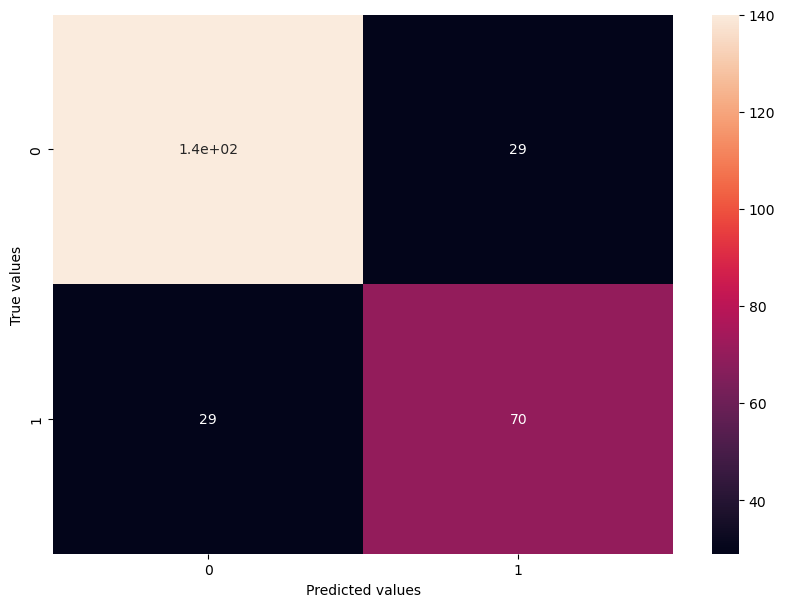

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

#Visualising it in a better way using seaborn

import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('True values')